## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9497045	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9327937	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9131102	total: 60.3ms	remaining: 20s
3:	learn: 0.8989019	total: 61.4ms	remaining: 15.3s
4:	learn: 0.8833915	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8679474	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8530160	total: 64.7ms	remaining: 9.18s
7:	learn: 0.8378932	total: 65.6ms	remaining: 8.14s
8:	learn: 0.8230074	total: 66.6ms	remaining: 7.33s
9:	learn: 0.8072802	total: 67.5ms	remaining: 6.68s
10:	learn: 0.7929592	total: 68.5ms	remaining: 6.16s
11:	learn: 0.7800594	total: 69.5ms	remaining: 5.72s
12:	learn: 0.7682725	total: 70.3ms	remaining: 5.33s
13:	learn: 0.7552815	total: 71.1ms	remaining: 5.01s
14:	learn: 0.7425554	total: 71.9ms	remaining: 4.72s
15:	learn: 0.7299336	total: 72.9ms	remaining: 4.48s
16:	learn: 0.7174013	total: 73.8ms	remaining: 4.27s
17:	learn: 0.7056573	total: 74.6ms	remaining: 4.07s
18:	learn: 0.6951202	total: 75.5ms	remaining: 

58:	learn: 0.4275305	total: 107ms	remaining: 1.71s
59:	learn: 0.4237867	total: 108ms	remaining: 1.69s
60:	learn: 0.4192801	total: 109ms	remaining: 1.67s
61:	learn: 0.4155753	total: 110ms	remaining: 1.66s
62:	learn: 0.4128259	total: 110ms	remaining: 1.64s
63:	learn: 0.4085026	total: 111ms	remaining: 1.63s
64:	learn: 0.4058688	total: 112ms	remaining: 1.61s
65:	learn: 0.4025025	total: 113ms	remaining: 1.59s
66:	learn: 0.3988447	total: 114ms	remaining: 1.58s
67:	learn: 0.3946681	total: 114ms	remaining: 1.57s
68:	learn: 0.3918364	total: 115ms	remaining: 1.55s
69:	learn: 0.3892493	total: 116ms	remaining: 1.54s
70:	learn: 0.3857564	total: 117ms	remaining: 1.53s
71:	learn: 0.3831751	total: 118ms	remaining: 1.52s
72:	learn: 0.3803091	total: 119ms	remaining: 1.51s
73:	learn: 0.3768322	total: 119ms	remaining: 1.5s
74:	learn: 0.3743489	total: 120ms	remaining: 1.48s
75:	learn: 0.3716475	total: 121ms	remaining: 1.47s
76:	learn: 0.3693856	total: 122ms	remaining: 1.46s
77:	learn: 0.3659650	total: 123m

160:	learn: 0.2482027	total: 191ms	remaining: 997ms
161:	learn: 0.2473418	total: 192ms	remaining: 995ms
162:	learn: 0.2467209	total: 193ms	remaining: 992ms
163:	learn: 0.2459468	total: 194ms	remaining: 988ms
164:	learn: 0.2452766	total: 195ms	remaining: 985ms
165:	learn: 0.2444713	total: 195ms	remaining: 982ms
166:	learn: 0.2433356	total: 196ms	remaining: 979ms
167:	learn: 0.2426261	total: 197ms	remaining: 976ms
168:	learn: 0.2418053	total: 198ms	remaining: 973ms
169:	learn: 0.2411380	total: 199ms	remaining: 970ms
170:	learn: 0.2405101	total: 200ms	remaining: 967ms
171:	learn: 0.2399518	total: 200ms	remaining: 965ms
172:	learn: 0.2393417	total: 201ms	remaining: 962ms
173:	learn: 0.2384581	total: 202ms	remaining: 960ms
174:	learn: 0.2376805	total: 203ms	remaining: 957ms
175:	learn: 0.2371985	total: 204ms	remaining: 954ms
176:	learn: 0.2365910	total: 205ms	remaining: 952ms
177:	learn: 0.2356147	total: 205ms	remaining: 949ms
178:	learn: 0.2350995	total: 206ms	remaining: 946ms
179:	learn: 

287:	learn: 0.1773069	total: 297ms	remaining: 735ms
288:	learn: 0.1767835	total: 298ms	remaining: 733ms
289:	learn: 0.1763856	total: 299ms	remaining: 732ms
290:	learn: 0.1761687	total: 300ms	remaining: 730ms
291:	learn: 0.1758667	total: 301ms	remaining: 729ms
292:	learn: 0.1753684	total: 301ms	remaining: 727ms
293:	learn: 0.1748182	total: 302ms	remaining: 725ms
294:	learn: 0.1745088	total: 303ms	remaining: 724ms
295:	learn: 0.1742993	total: 304ms	remaining: 722ms
296:	learn: 0.1738997	total: 304ms	remaining: 721ms
297:	learn: 0.1733670	total: 305ms	remaining: 719ms
298:	learn: 0.1730286	total: 306ms	remaining: 718ms
299:	learn: 0.1726364	total: 307ms	remaining: 717ms
300:	learn: 0.1722514	total: 308ms	remaining: 715ms
301:	learn: 0.1718260	total: 309ms	remaining: 714ms
302:	learn: 0.1715468	total: 310ms	remaining: 712ms
303:	learn: 0.1710940	total: 311ms	remaining: 711ms
304:	learn: 0.1707829	total: 311ms	remaining: 710ms
305:	learn: 0.1704222	total: 312ms	remaining: 708ms
306:	learn: 

387:	learn: 0.1466243	total: 381ms	remaining: 601ms
388:	learn: 0.1462400	total: 382ms	remaining: 600ms
389:	learn: 0.1460094	total: 383ms	remaining: 599ms
390:	learn: 0.1456669	total: 384ms	remaining: 598ms
391:	learn: 0.1453299	total: 385ms	remaining: 597ms
392:	learn: 0.1449360	total: 386ms	remaining: 596ms
393:	learn: 0.1445719	total: 386ms	remaining: 594ms
394:	learn: 0.1442893	total: 387ms	remaining: 593ms
395:	learn: 0.1442479	total: 388ms	remaining: 592ms
396:	learn: 0.1442063	total: 389ms	remaining: 591ms
397:	learn: 0.1440109	total: 390ms	remaining: 591ms
398:	learn: 0.1438835	total: 391ms	remaining: 589ms
399:	learn: 0.1437110	total: 392ms	remaining: 588ms
400:	learn: 0.1434513	total: 393ms	remaining: 587ms
401:	learn: 0.1432517	total: 395ms	remaining: 587ms
402:	learn: 0.1429621	total: 395ms	remaining: 586ms
403:	learn: 0.1427056	total: 396ms	remaining: 585ms
404:	learn: 0.1426517	total: 397ms	remaining: 583ms
405:	learn: 0.1422664	total: 398ms	remaining: 582ms
406:	learn: 

510:	learn: 0.1207307	total: 488ms	remaining: 467ms
511:	learn: 0.1205018	total: 489ms	remaining: 466ms
512:	learn: 0.1202743	total: 490ms	remaining: 465ms
513:	learn: 0.1200237	total: 490ms	remaining: 464ms
514:	learn: 0.1197411	total: 491ms	remaining: 463ms
515:	learn: 0.1197131	total: 492ms	remaining: 461ms
516:	learn: 0.1193969	total: 493ms	remaining: 460ms
517:	learn: 0.1192271	total: 493ms	remaining: 459ms
518:	learn: 0.1190475	total: 494ms	remaining: 458ms
519:	learn: 0.1189980	total: 495ms	remaining: 457ms
520:	learn: 0.1188172	total: 496ms	remaining: 456ms
521:	learn: 0.1187842	total: 497ms	remaining: 455ms
522:	learn: 0.1185333	total: 498ms	remaining: 454ms
523:	learn: 0.1183014	total: 499ms	remaining: 453ms
524:	learn: 0.1182766	total: 499ms	remaining: 452ms
525:	learn: 0.1181161	total: 500ms	remaining: 451ms
526:	learn: 0.1179491	total: 501ms	remaining: 450ms
527:	learn: 0.1175983	total: 502ms	remaining: 449ms
528:	learn: 0.1173826	total: 503ms	remaining: 448ms
529:	learn: 

608:	learn: 0.1033220	total: 572ms	remaining: 367ms
609:	learn: 0.1032838	total: 573ms	remaining: 366ms
610:	learn: 0.1031126	total: 574ms	remaining: 365ms
611:	learn: 0.1030027	total: 574ms	remaining: 364ms
612:	learn: 0.1029743	total: 575ms	remaining: 363ms
613:	learn: 0.1027735	total: 576ms	remaining: 362ms
614:	learn: 0.1025879	total: 577ms	remaining: 361ms
615:	learn: 0.1024264	total: 578ms	remaining: 360ms
616:	learn: 0.1022611	total: 579ms	remaining: 359ms
617:	learn: 0.1020255	total: 579ms	remaining: 358ms
618:	learn: 0.1018228	total: 580ms	remaining: 357ms
619:	learn: 0.1016567	total: 581ms	remaining: 356ms
620:	learn: 0.1014660	total: 582ms	remaining: 355ms
621:	learn: 0.1012500	total: 583ms	remaining: 354ms
622:	learn: 0.1010180	total: 584ms	remaining: 353ms
623:	learn: 0.1008425	total: 584ms	remaining: 352ms
624:	learn: 0.1006914	total: 585ms	remaining: 351ms
625:	learn: 0.1006799	total: 586ms	remaining: 350ms
626:	learn: 0.1004345	total: 587ms	remaining: 349ms
627:	learn: 

733:	learn: 0.0864477	total: 678ms	remaining: 246ms
734:	learn: 0.0863115	total: 679ms	remaining: 245ms
735:	learn: 0.0860828	total: 680ms	remaining: 244ms
736:	learn: 0.0859011	total: 681ms	remaining: 243ms
737:	learn: 0.0857914	total: 682ms	remaining: 242ms
738:	learn: 0.0857456	total: 683ms	remaining: 241ms
739:	learn: 0.0856264	total: 683ms	remaining: 240ms
740:	learn: 0.0854195	total: 684ms	remaining: 239ms
741:	learn: 0.0853183	total: 685ms	remaining: 238ms
742:	learn: 0.0852190	total: 686ms	remaining: 237ms
743:	learn: 0.0851189	total: 687ms	remaining: 236ms
744:	learn: 0.0850620	total: 688ms	remaining: 235ms
745:	learn: 0.0849775	total: 688ms	remaining: 234ms
746:	learn: 0.0848291	total: 689ms	remaining: 233ms
747:	learn: 0.0847164	total: 690ms	remaining: 232ms
748:	learn: 0.0845926	total: 691ms	remaining: 231ms
749:	learn: 0.0844650	total: 692ms	remaining: 231ms
750:	learn: 0.0843357	total: 692ms	remaining: 230ms
751:	learn: 0.0842681	total: 693ms	remaining: 229ms
752:	learn: 

834:	learn: 0.0753556	total: 762ms	remaining: 151ms
835:	learn: 0.0753343	total: 763ms	remaining: 150ms
836:	learn: 0.0753035	total: 765ms	remaining: 149ms
837:	learn: 0.0752879	total: 765ms	remaining: 148ms
838:	learn: 0.0752015	total: 766ms	remaining: 147ms
839:	learn: 0.0751105	total: 767ms	remaining: 146ms
840:	learn: 0.0749896	total: 768ms	remaining: 145ms
841:	learn: 0.0749510	total: 769ms	remaining: 144ms
842:	learn: 0.0748215	total: 770ms	remaining: 143ms
843:	learn: 0.0747688	total: 770ms	remaining: 142ms
844:	learn: 0.0745955	total: 771ms	remaining: 141ms
845:	learn: 0.0745168	total: 772ms	remaining: 141ms
846:	learn: 0.0744118	total: 773ms	remaining: 140ms
847:	learn: 0.0743364	total: 774ms	remaining: 139ms
848:	learn: 0.0742800	total: 774ms	remaining: 138ms
849:	learn: 0.0741887	total: 775ms	remaining: 137ms
850:	learn: 0.0741209	total: 776ms	remaining: 136ms
851:	learn: 0.0740912	total: 777ms	remaining: 135ms
852:	learn: 0.0739870	total: 778ms	remaining: 134ms
853:	learn: 

960:	learn: 0.0645109	total: 869ms	remaining: 35.3ms
961:	learn: 0.0644840	total: 870ms	remaining: 34.4ms
962:	learn: 0.0643955	total: 871ms	remaining: 33.4ms
963:	learn: 0.0642829	total: 871ms	remaining: 32.5ms
964:	learn: 0.0641719	total: 872ms	remaining: 31.6ms
965:	learn: 0.0640621	total: 873ms	remaining: 30.7ms
966:	learn: 0.0640004	total: 874ms	remaining: 29.8ms
967:	learn: 0.0639856	total: 875ms	remaining: 28.9ms
968:	learn: 0.0638845	total: 876ms	remaining: 28ms
969:	learn: 0.0638337	total: 876ms	remaining: 27.1ms
970:	learn: 0.0637899	total: 877ms	remaining: 26.2ms
971:	learn: 0.0637388	total: 878ms	remaining: 25.3ms
972:	learn: 0.0636733	total: 879ms	remaining: 24.4ms
973:	learn: 0.0636377	total: 880ms	remaining: 23.5ms
974:	learn: 0.0636281	total: 881ms	remaining: 22.6ms
975:	learn: 0.0635667	total: 881ms	remaining: 21.7ms
976:	learn: 0.0634343	total: 882ms	remaining: 20.8ms
977:	learn: 0.0633020	total: 883ms	remaining: 19.9ms
978:	learn: 0.0632266	total: 884ms	remaining: 19

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

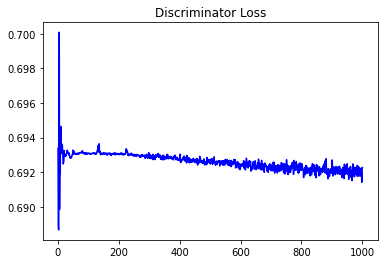

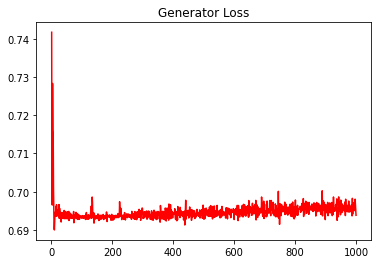

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05650931828042303


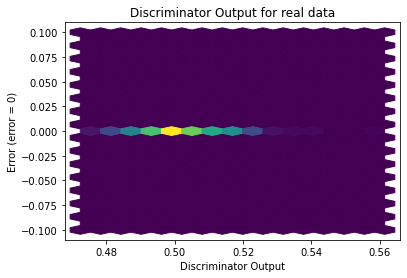

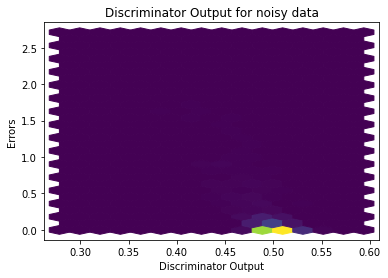

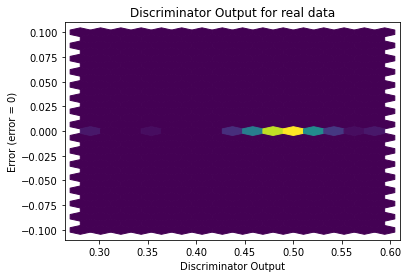

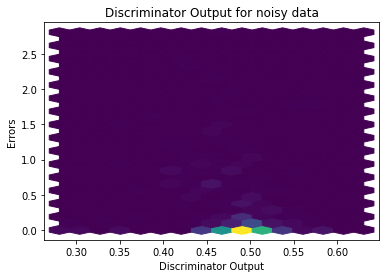

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


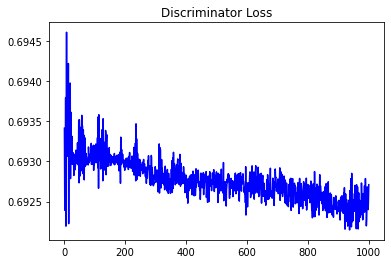

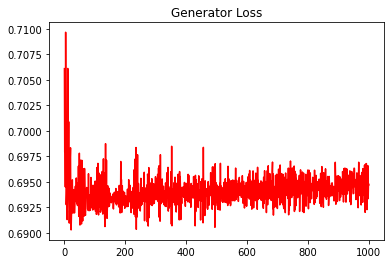

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05746168139207388


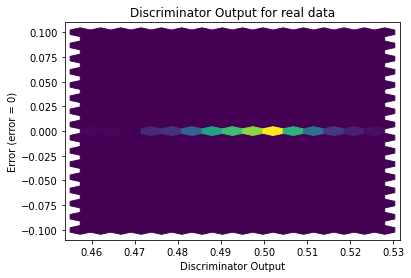

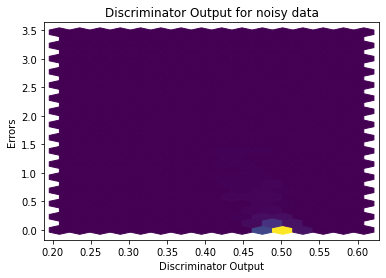

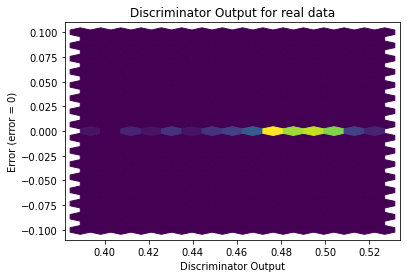

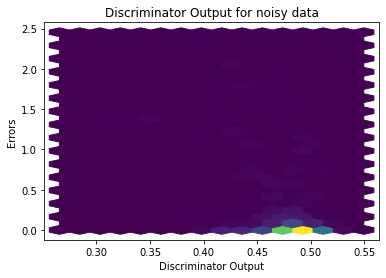

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2317]], requires_grad=True)
